In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, collections
import matplotlib as mpl


In [2]:
truth_df = pd.read_csv('data/politifact_truthiness_09_11_19.csv')

truth_df['n_at_least_mostly_false'] = truth_df['n_mostly_false'] + truth_df['n_false'] + truth_df['n_pants_on_fire']
truth_df['n_at_least_fully_false'] = truth_df['n_false'] + truth_df['n_pants_on_fire']

truth_df['n_total'] = truth_df['n_at_least_mostly_false'] + truth_df['n_true'] + truth_df['n_mostly_true'] +\
        truth_df['n_half_true']

#### Filter those with too few checks
truth_df = truth_df[truth_df['n_total']>10]

In [3]:
truth_categories = ['true', 'mostly_true', 'half_true', 'mostly_false', 'false', 'pants_on_fire']
truth_descriptions = ['True', 'Mostly true', 'Half true', 'Mostly false', 'False', 'Pants on fire']
n_truth_categories = len(truth_categories)

In [4]:
truth_df

,name,n_true,n_mostly_true,n_half_true,n_mostly_false,n_false,n_pants_on_fire,n_at_least_mostly_false,n_at_least_fully_false,n_total
0,Donald Trump,32,76,99,153,248,104,505,352,712
1,Joe Biden,14,21,24,16,13,4,33,17,92
2,Bernie Sanders,19,53,38,22,16,0,38,16,148
3,Elizabeth Warren,3,8,9,0,0,0,0,0,20
4,Kamala Harris,2,10,4,3,6,0,9,6,25
6,Beto O'Rourke,6,6,7,5,1,0,6,1,25
7,Amy Klobuchar,3,7,2,0,1,0,1,1,13
9,Corey Booker,7,11,4,2,6,0,8,6,30
10,Julian Castro,6,6,5,0,0,0,0,0,17


In [5]:
def get_frac_and_error(row, statement_type):
    n_not_ok = row['n_'+statement_type]
    n_total = row['n_total']
    n_ok = n_total - n_not_ok
    
    frac = n_not_ok / float(n_total)
    frac_err = math.sqrt((n_ok*n_ok*max(n_not_ok,2)) + (n_not_ok*n_not_ok*max(n_ok,2))) / n_total**2.
    row['frac_'+statement_type] = frac
    row['frac_'+statement_type+'_err'] = frac_err    
    return row

for statement_type in truth_categories:
    truth_df = truth_df.apply(get_frac_and_error, args=(statement_type,), axis=1)
truth_df = truth_df.apply(get_frac_and_error, args=('at_least_mostly_false',), axis=1)
truth_df = truth_df.apply(get_frac_and_error, args=('at_least_fully_false',), axis=1)

In [6]:
truth_df

,name,n_true,n_mostly_true,n_half_true,n_mostly_false,n_false,n_pants_on_fire,n_at_least_mostly_false,n_at_least_fully_false,n_total,...,frac_mostly_false,frac_mostly_false_err,frac_false,frac_false_err,frac_pants_on_fire,frac_pants_on_fire_err,frac_at_least_mostly_false,frac_at_least_mostly_false_err,frac_at_least_fully_false,frac_at_least_fully_false_err
0,Donald Trump,32,76,99,153,248,104,505,352,712,...,0.214888,0.015393,0.348315,0.017855,0.146067,0.013236,0.709270,0.017018,0.494382,0.018737
1,Joe Biden,14,21,24,16,13,4,33,17,92,...,0.173913,0.039517,0.141304,0.036316,0.043478,0.021261,0.358696,0.050004,0.184783,0.040464
2,Bernie Sanders,19,53,38,22,16,0,38,16,148,...,0.148649,0.029242,0.108108,0.025524,0.000000,0.009555,0.256757,0.035908,0.108108,0.025524
3,Elizabeth Warren,3,8,9,0,0,0,0,0,20,...,0.000000,0.070711,0.000000,0.070711,0.000000,0.070711,0.000000,0.070711,0.000000,0.070711
4,Kamala Harris,2,10,4,3,6,0,9,6,25,...,0.120000,0.064992,0.240000,0.085417,0.000000,0.056569,0.360000,0.096000,0.240000,0.085417
6,Beto O'Rourke,6,6,7,5,1,0,6,1,25,...,0.200000,0.080000,0.040000,0.054869,0.000000,0.056569,0.240000,0.085417,0.040000,0.054869
7,Amy Klobuchar,3,7,2,0,1,0,1,1,13,...,0.000000,0.108786,0.076923,0.102488,0.000000,0.108786,0.076923,0.102488,0.076923,0.102488
9,Corey Booker,7,11,4,2,6,0,8,6,30,...,0.066667,0.045542,0.200000,0.073030,0.000000,0.047140,0.266667,0.080737,0.200000,0.073030
10,Julian Castro,6,6,5,0,0,0,0,0,17,...,0.000000,0.083189,0.000000,0.083189,0.000000,0.083189,0.000000,0.083189,0.000000,0.083189


import plotting_tools

plot_options_dict = {
    'grid': True,
    'figsize': (12,8),
    'title': 'Honesty of each candidate',
    'ylabel': 'Number of statements in each category'
}


list_of_x_data_bars = [truth_df['name'].values]*n_truth_categories
list_of_y_data_bars = [truth_df['n_'+truth_category].values for truth_category in truth_categories]
list_of_y_errs = [these_y_values**0.5 for these_y_values in list_of_y_data_bars]
plotting_tools.overlay_bar_charts(list_of_x_data_bars=list_of_x_data_bars,
                                  list_of_y_data_bars=list_of_y_data_bars,
                                 list_of_y_errs=list_of_y_errs,
                                 legend_label_list=truth_descriptions,
                                 plot_options_dict=plot_options_dict)

plot_options_dict = {
    'grid': True,
    'figsize': (12,8),
    'title': 'Honesty of each candidate',
    'ylabel': 'Fraction of statements in each category'
}


list_of_x_data_bars = [truth_df['name'].values]*n_truth_categories
list_of_y_data_bars = [truth_df['frac_'+truth_category].values for truth_category in truth_categories]
list_of_y_errs = [truth_df['frac_'+truth_category+'_err'].values for truth_category in truth_categories]
plotting_tools.overlay_bar_charts(list_of_x_data_bars=list_of_x_data_bars,
                                  list_of_y_data_bars=list_of_y_data_bars,
                                 list_of_y_errs=list_of_y_errs,
                                 legend_label_list=truth_descriptions,
                                 plot_options_dict=plot_options_dict)

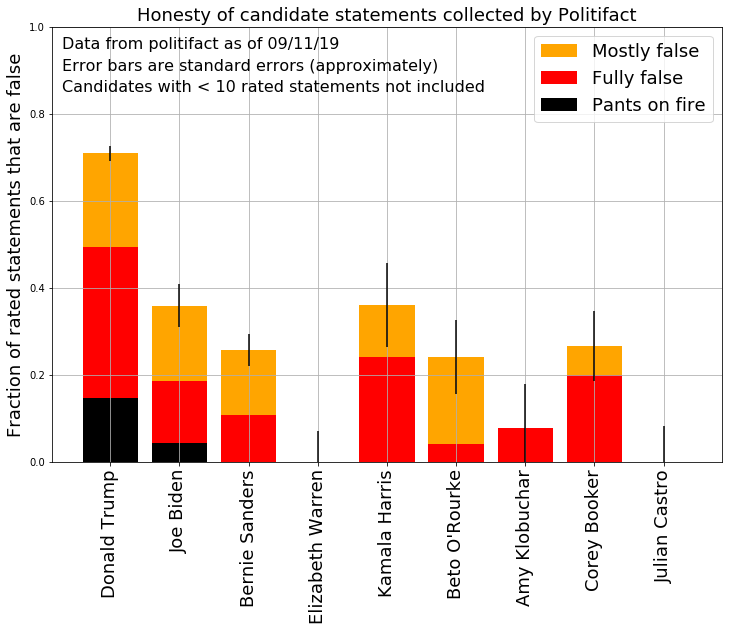

In [7]:
import seaborn as sns


plot_options_dict = {
    'grid': True,
    'figsize': (12,8),
    'title': 'Honesty of candidate statements according to Politifact',
    'ylabel': 'Fraction of statements that are false'
}

plt.figure(figsize=(12,8))
plt.grid(True)
plt.ylabel('Fraction of rated statements that are false', fontsize=18)
plt.title('Honesty of candidate statements collected by Politifact', fontsize=18)
plt.bar(x=truth_df['name'].values, height=truth_df['frac_at_least_mostly_false'].values,
        yerr=truth_df['frac_at_least_mostly_false_err'].values, color='orange', label='Mostly false')
plt.bar(x=truth_df['name'].values, height=truth_df['frac_at_least_fully_false'].values,
        color='red', label='Fully false')
plt.bar(x=truth_df['name'].values, height=truth_df['frac_pants_on_fire'].values,
        color='black', label='Pants on fire')
n_labels = len(truth_df['name'].values)
plt.xticks(np.arange(n_labels), truth_df['name'].values, rotation='vertical', fontsize=18)
plt.text(-0.7, 0.95, 'Data from politifact as of 09/11/19',  fontsize=16)
plt.text(-0.7, 0.9, 'Error bars are standard errors (approximately)',  fontsize=16)
plt.text(-0.7, 0.85, 'Candidates with < 10 rated statements not included',  fontsize=16)

plt.legend(fontsize=18)
plt.gca().set_ylim([0.,1.])
# mpl.rcParams['xtick.labelsize'] = 18
# mpl.rcParams['ytick.labelsize'] = 18

plt.show()